Goals of this project:
1. How much impact does being late or too spaced out at the first stop have downstream?
2. What is the impact of the layover at the start of the trip (the difference between the first top arrival and departure time)? Does more layover lead to more stable headways (lower values for % headway deviation)?
3. How closely does lateness (ADHERENCE) correlate to headway?
4. What is the relationship between distance or time travelled since the start of a given trip and the headway deviation? Does headway become less statble the further along the route the bus has travelled?
5. How much of a factor does the driver have on headway and on-time performance? The driver is indicated by the OPERATOR variable.
6. How does direction of travel, route, or location affect the headway and on-time performance?
7. How does time of day or day of week affect headway and on-time performance? Can you detect an impact of school schedule on headway deviation (for certain routes and at certain times of day)?
8. Does weather have any effect on headway or on-time performance? To help answer this question, the file bna_2022.csv contains historical weather data recorded at Nashville International Airport.

In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### Access, Display DataFrames

In [120]:
# Access 'Headway Data.csv'
headway = pd.read_csv('../data/Headway Data.csv')
headway.head()

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,...,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,BLOCK_STOP_ORDER,DWELL_IN_MINS
0,120211101,1,76447164,2021-11-01,7,1704,2088,297750,0,TO DOWNTOWN,...,15.983333,1.983333,0,0,1,0,0.0,0,2,12.650000
1,120211101,1,76447165,2021-11-01,7,1704,2088,297750,0,TO DOWNTOWN,...,17.333333,3.333333,0,0,1,0,0.0,0,11,0.000000
2,120211101,1,76447166,2021-11-01,7,1704,2088,297750,0,TO DOWNTOWN,...,NaN,NaN,0,1,0,0,NaN,0,23,22.416666
3,120211101,1,76447167,2021-11-01,50,1704,2088,297749,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,24,5.766666
4,120211101,1,76447168,2021-11-01,50,1704,2088,297749,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,NaN,0,25,0.000000


In [ ]:
# Access 'bna_2022.csv'
bna_2022 = pd.read_csv('../data/bna_2022.csv')
bna_2022.head()

In [ ]:
# Access 'bna_weather.csv'
bna_weather = pd.read_csv('../data/bna_weather.csv')
bna_weather.head()

### Exploratory Data Analysis

#### Categorical Variables (Bus Routes)

Look for data types using `.info()`

In [ ]:
headway.info()

Count null values using `.isna().sum()`

In [ ]:
headway.isna().sum()

In [ ]:
# Identify the number of bus routes values within the dataset
headway['ROUTE_ABBR'].value_counts()

In [ ]:
# Identify the percentage of each route within the dataset
headway['ROUTE_ABBR'].value_counts(normalize = True)

In [ ]:
# Display the number of entries within the dataset
headway['ROUTE_ABBR'].value_counts().plot(kind = 'bar',
                                         figsize = (10,6))

plt.xticks(rotation = 0,
           fontsize = 12)                   
plt.title('Entries by Bus Route',
         fontsize = 14,
         fontweight = 'bold');

#### Numeric Variables

In [ ]:
# Display the mean, median, max, min, standard deviation, and quartiles of adherence to the schedule
headway['ADHERENCE'].describe()

### Edit, Transform

In [121]:
# Make a new 'headway' DataFrame with only the columns needed
headway_slim = headway.drop(headway.iloc[:, 22:30],axis = 1)
headway_slim.head(19)

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,...,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV
0,120211101,1,76447164,2021-11-01,7,1704,2088,297750,0,TO DOWNTOWN,...,1,36.107575,-86.812719,14:10:00,13:59:21,14:12:00,-2.000000,14.0,15.983333,1.983333
1,120211101,1,76447165,2021-11-01,7,1704,2088,297750,0,TO DOWNTOWN,...,0,36.138372,-86.800622,14:20:00,14:23:21,14:23:21,-3.350000,14.0,17.333333,3.333333
2,120211101,1,76447166,2021-11-01,7,1704,2088,297750,0,TO DOWNTOWN,...,2,36.167091,-86.781923,14:39:00,14:36:46,14:59:11,-20.183333,NaN,NaN,NaN
3,120211101,1,76447167,2021-11-01,50,1704,2088,297749,0,TO DOWNTOWN,...,1,36.161008,-86.800851,15:10:00,15:04:31,15:10:17,-0.283333,NaN,NaN,NaN
4,120211101,1,76447168,2021-11-01,50,1704,2088,297749,0,TO DOWNTOWN,...,2,36.167091,-86.781923,15:27:00,15:16:59,15:16:59,10.016666,NaN,NaN,NaN
5,120211101,1,76447969,2021-11-01,22,2200,1352,298143,0,TO DOWNTOWN,...,1,36.178360,-86.845441,04:42:00,04:29:30,04:41:50,0.166666,NaN,NaN,NaN
6,120211101,1,76447970,2021-11-01,22,2200,1352,298143,0,TO DOWNTOWN,...,0,36.193454,-86.839981,04:46:00,04:46:58,04:46:58,-0.966666,NaN,NaN,NaN
7,120211101,1,76447971,2021-11-01,22,2200,1352,298143,0,TO DOWNTOWN,...,0,36.182177,-86.814445,04:54:00,04:55:00,04:55:00,-1.000000,NaN,NaN,NaN
8,120211101,1,76447972,2021-11-01,22,2200,1352,298143,0,TO DOWNTOWN,...,2,36.167091,-86.781923,05:10:00,05:05:26,05:05:26,4.566666,NaN,NaN,NaN
9,120211101,1,76447973,2021-11-01,22,2200,1352,298162,0,FROM DOWNTOWN,...,1,36.167091,-86.781923,05:15:00,05:05:26,05:16:49,-1.816666,NaN,NaN,NaN


In [ ]:
headway_slim.info()

In [ ]:
# # Drop NaN values from the 'SCHEDULED_HDWY', 'ACTUAL_HDWY', 'HDWY_DEV' columns
# headway_slim.dropna(subset=['SCHEDULED_HDWY', 'ACTUAL_HDWY', 'HDWY_DEV'])
# # Show one to/from round to define impact
# headway_slim.head(10)

In [ ]:
# Verify that NaN values have been dropped from DataFrame
headway_slim.isna().sum()

#### Q1:
How much impact does being late or too spaced out at the first stop have downstream?

#### ADHERENCE quartiles

In [122]:
# Identify the quartiles for 'ADHERENCE' ('ACTUAL_DEPARTURE_TIME' - 'SCHEDULED_TIME')
headway_slim['ADHERENCE'].describe()

count    1.927285e+06
mean    -2.193849e+00
std      4.886912e+00
min     -5.067667e+02
25%     -3.400000e+00
50%     -1.383333e+00
75%     -1.333330e-01
max      7.883333e+01
Name: ADHERENCE, dtype: float64

In [124]:
# For loop to identify  'ADHERENCE' ('ACTUAL_DEPARTURE_TIME' - 'SCHEDULED_TIME') quartile
headway_slim['ADHERENCE_QUARTILE'] = ''
for ind, row in headway_slim.iterrows():
    if row['ADHERENCE'] < -3.4:
        headway_slim.loc[ind, 'ADHERENCE_QUARTILE'] = 'Slowest 25% Quartile'
    elif row['ADHERENCE'] < -1.383:
        headway_slim.loc[ind, 'ADHERENCE_QUARTILE'] = 'Median'
    elif row['ADHERENCE'] < -1.333333:
        headway_slim.loc[ind, 'ADHERENCE_QUARTILE'] = '50% - 75% Quartile'
    else:
        headway_slim.loc[ind, 'ADHERENCE_QUARTILE'] = 'Fastest 25% Quartile'
headway_slim.head()

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,...,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADHERENCE_QUARTILE
0,120211101,1,76447164,2021-11-01,7,1704,2088,297750,0,TO DOWNTOWN,...,36.107575,-86.812719,14:10:00,13:59:21,14:12:00,-2.000000,14.0,15.983333,1.983333,Median
1,120211101,1,76447165,2021-11-01,7,1704,2088,297750,0,TO DOWNTOWN,...,36.138372,-86.800622,14:20:00,14:23:21,14:23:21,-3.350000,14.0,17.333333,3.333333,Median
2,120211101,1,76447166,2021-11-01,7,1704,2088,297750,0,TO DOWNTOWN,...,36.167091,-86.781923,14:39:00,14:36:46,14:59:11,-20.183333,NaN,NaN,NaN,Slowest 25% Quartile
3,120211101,1,76447167,2021-11-01,50,1704,2088,297749,0,TO DOWNTOWN,...,36.161008,-86.800851,15:10:00,15:04:31,15:10:17,-0.283333,NaN,NaN,NaN,Fastest 25% Quartile
4,120211101,1,76447168,2021-11-01,50,1704,2088,297749,0,TO DOWNTOWN,...,36.167091,-86.781923,15:27:00,15:16:59,15:16:59,10.016666,NaN,NaN,NaN,Fastest 25% Quartile


In [126]:
# Group 'ADHERENCE' averages by 'ADHERENCE_QUARTILE' and 'TRIP_EDGE'
headway_quartile = headway_slim.groupby(['ADHERENCE_QUARTILE', 'TRIP_EDGE']).agg({'ADHERENCE':['mean']})
headway_quartile

ADHERENCE
                                    mean
ADHERENCE_QUARTILE   TRIP_EDGE          
50% - 75% Quartile   0         -1.358231
                     1         -1.359640
                     2         -1.357847
Fastest 25% Quartile 0         -0.170319
                     1          0.071719
                     2          2.143637
Median               0         -2.282941
                     1         -2.236970
                     2         -2.310418
Slowest 25% Quartile 0         -7.442101
                     1         -5.994766
                     2         -8.949721

In [127]:
# Group 'ADHERENCE' averages by 'ADHERENCE_QUARTILE','TRIP_EDGE', 'ROUTE_ABBR'
headway_quartile = headway_slim.groupby(['ADHERENCE_QUARTILE', 'TRIP_EDGE', 'ROUTE_ABBR']).agg({'ADHERENCE':['mean']})
headway_quartile

ADHERENCE
                                               mean
ADHERENCE_QUARTILE   TRIP_EDGE ROUTE_ABBR          
50% - 75% Quartile   0         3          -1.358102
                               7          -1.358841
                               22         -1.358974
                               23         -1.357953
                               50         -1.358212
...                                             ...
Slowest 25% Quartile 2         23         -6.972612
                               50         -8.752961
                               52         -9.970466
                               55         -9.772484
                               56         -9.048285

[96 rows x 1 columns]

#### HDWY_DEV quartiles

In [ ]:
# Identify the quartiles for 'HDWY_DEV' ('ACTUAL_HDWY' - 'SCHEDULED_HDWY')
headway_slim['HDWY_DEV'].describe()

In [ ]:
# For loop to identify  'HDWY_DEV' ('ACTUAL_HDWY' - 'SCHEDULED_HDWY') quartile
headway_slim['HDWY_QUARTILE'] = ''
for ind, row in headway_slim.iterrows():
    if row['HDWY_DEV'] < -1.88:
        headway_slim.loc[ind, 'HDWY_QUARTILE'] = 'Slowest 25% Quartile'
    elif row['HDWY_DEV'] < 0:
        headway_slim.loc[ind, 'HDWY_QUARTILE'] ='Median'
    elif row['HDWY_DEV'] < 1.9666666:
        headway_slim.loc[ind, 'HDWY_QUARTILE'] ='50% - 75% Quartile'
    else:
        headway_slim.loc[ind, 'HDWY_QUARTILE'] ='Fastest 25% Quartile'
headway_slim.head()

In [ ]:
# Group 'HDWY_DEV' averages by 'HDWY_QUARTILE' and 'TRIP_EDGE'
headway_quartile = headway_slim.groupby(['HDWY_QUARTILE', 'TRIP_EDGE']).agg({'HDWY_DEV':['mean']})
headway_quartile

#### Q2:
> What is the impact of the layover at the start of the trip (the difference between the first stop arrival and departure time)? ('ADHERENCE')

> Does more layover lead to more stable headways (lower values for % headway deviation)?

#### Q3:
How closely does lateness (ADHERENCE) correlate to headway?

In [ ]:
ad_head = headway_slim[['ACTUAL_ARRIVAL_TIME', 'ACTUAL_DEPARTURE_TIME', 'ADHERENCE', 'SCHEDULED_HDWY', 'ACTUAL_HDWY', 'HDWY_DEV']]
ad_head.head()

C:\Users\tyler\AppData\Local\Temp\ipykernel_1560\2521886026.py:9: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


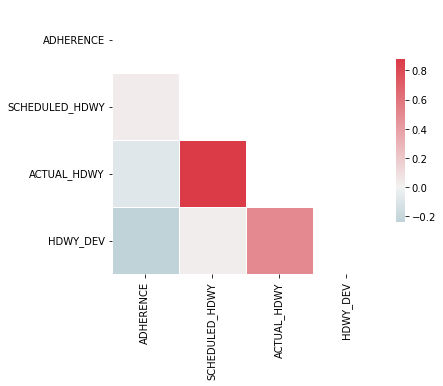

In [128]:
plt.figure(figsize=(6, 6))

corr = ad_head.corr()

# Create a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap, mask=mask, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

#### Q4:
> What is the relationship between distance or time travelled since the start of a given trip and the headway deviation?

> Does headway become less statble the further along the route the bus has travelled?

#### Q5:
> How much of a factor does the driver have on headway and on-time performance? The driver is indicated by the 'OPERATOR' variable.

#### Q6:
How does direction of travel ('ROUTE_DIRECTION_NAME'), route ('ROUTE_ABBR'), or location ('TIME_POINT_ABBR') affect the headway and on-time performance?

#### Q7:
> How does time of day or day of week affect headway and on-time performance?

> Can you detect an impact of school schedule on headway deviation (for certain routes and at certain times of day)?

#### Q8:
> Does weather have any effect on headway or on-time performance?

> To help answer this question, the file bna_2022.csv contains historical weather data recorded at Nashville International Airport.